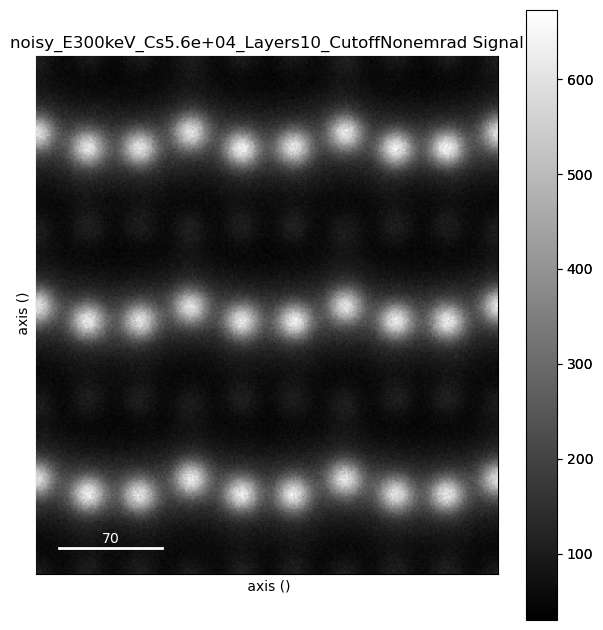

In [15]:
import skimage
import matplotlib.pyplot as plt
import hyperspy.api as hs
import sys
sys.path.append('../..')
import util.crop

s = hs.load("../../data/simulations/tests/noisy_E300keV_Cs5.6e+04_Layers10_CutoffNonemrad.npy")
s.plot()